In [1]:
!pip install wordcloud

In [2]:
import os
import pandas as pd
from wordcloud import WordCloud 
import matplotlib.pyplot as plt

PATH = os.path.abspath(os.path.join(os.getcwd()))

In [3]:
database= os.path.join(PATH, "data.csv")
complete_database = pd.read_csv(database, na_values='')
#complete_database.columns = ['Source', 'ReviewDate', 'SKU_Seller', 'ReviewUser', 'ReviewRate', 'ReviewTitle','ReviewText']
# complete_database.rename(columns={'t2_all_fr_reviews.id_source': 'Source', 't2_all_fr_reviews.reviewdate': 'ReviewDate', 't2_all_fr_reviews.sku_seller': 'SKU_Seller', 't2_all_fr_reviews.reviewuser': 'ReviewUser', 't2_all_fr_reviews.reviewrate': 'ReviewRate', 't2_all_fr_reviews.reviewtitle': 'ReviewTitle','t2_all_fr_reviews.reviewtext': 'ReviewText' }, inplace=True)

In [4]:
# complete_database.head()

## Read data from CSV file

In [5]:
k = 21
process = "Process2_b"
algorithm = "NMF"
doc_topic_matrix_filepath = os.path.join(PATH, algorithm + "_output", "k_" + str(k), "doc_topic_matrix.csv")
word_topic_matrix_filepath = os.path.join(PATH, algorithm + "_output", "k_" + str(k), "word_topic_matrix.csv")

In [6]:
doc_topic_matrix = pd.read_csv(doc_topic_matrix_filepath, encoding='utf-8', sep=";")
word_topic_matrix = pd.read_csv(word_topic_matrix_filepath, encoding='utf-8', sep=";")

In [7]:
word_topic_matrix = word_topic_matrix.drop(['Unnamed: 0'], axis=1)
doc_topic_matrix = doc_topic_matrix.drop(['Unnamed: 0'], axis=1)

nb_topics = word_topic_matrix.shape[1] - 1
nb_documents = doc_topic_matrix.shape[0]

In [8]:
# word_topic_matrix.head(10)

## Create dict for the visualization 

In [9]:
# #%% create pandas dataframe for the topics

# df = pd.DataFrame({"feature_name": feature_names})
# for topic_idx, topic in enumerate(word_topic_matrix):
#     df["topic_" + str(topic_idx)] = word_topic_matrix[topic_idx].values


In [10]:
words_topic_list = [0]*nb_topics
for i in range(nb_topics):
    words_topic_list[i] = pd.Series(word_topic_matrix[str(i)].values,index=word_topic_matrix.term).sort_values(ascending=False).to_dict()

doc_topic_list = [0]*nb_documents
for i in range(nb_documents):
    doc_topic_list[i] = pd.Series(doc_topic_matrix.iloc[i].drop(['documents']).values).sort_values(ascending=False).to_dict()

## Visualize top 10 words of each topic

In [11]:
import heapq
from operator import itemgetter

def best_words(k, *mywords_topic , nb_words=10):
    n_row = len(mywords_topic)
    n_col = 1
    txt_filepath = os.path.join(PATH, algorithm + "_output", "k_" + str(k), process + "_top_words.txt")
    print(txt_filepath)
    file = open(txt_filepath, 'w')
    file.write('Here are the most important {} words for each topic'.format(nb_words))
    for index,item in enumerate(mywords_topic):
        
        file.write('\nTopic number {0} :'.format(index))
        for term, frequency in dict(heapq.nlargest(nb_words, item.items(), key=itemgetter(1))).items():
            file.write(u'\n\t{:20}\t{:.3f}'.format(term, round(frequency, 3)))
    file.close()

myarg = words_topic_list
best_words( k, *myarg, nb_words=10)

D:\3A\KITE\TrendMeter\topic_decomp\NMF_output\k_21\Process2_b_top_words.txt


In [12]:
import heapq
from operator import itemgetter

def best_topics(k, *mydocuments_topic, ratio):
    txt_filepath = os.path.join(PATH, algorithm + "_output", "k_" + str(k), process + "_top_topics.txt")
    file = open(txt_filepath, 'w')
    file.write('Here are the topics of each document')
    for index, item in enumerate(mydocuments_topic):
        file.write('\n{:20}'.format(doc_topic_matrix.iloc[index].documents))
        dictionnary = list(dict(heapq.nlargest(3, item.items(), key=itemgetter(1))).items())
        best_topic = dictionnary[0][1]
        for i in range(3):
            item = dictionnary[i]
            if item[1]>=(1-ratio)*best_topic:
                file.write(u'\n\tTopic ' +str(item[0])+ '\t'+ str(round(item[1], 3)))
    file.close()

myarg = doc_topic_list
best_topics(k, *myarg, ratio = 0.3)

In [13]:
%matplotlib inline

def wdc(*mywords_topic):
   n_row = len(mywords_topic)
   n_col = 1
   plt.figure(figsize = ( n_col * 3 *3,  n_row * 3*2))    
   
   wordcloud = WordCloud()
   i = 0
   for item in mywords_topic:
       wordcloud.fit_words(item)
       plt.subplot(n_row, n_col, i+1)
       plt.title('Topic %s' %str(i+1), size = 16)
       plt.imshow(wordcloud)
       plt.axis("off")
       i += 1


## Create a word cloud for each topic

In [14]:
nb_topics = k
# word_topic_matrix_filepath = "C:\\Users\\Jamila\\OneDrive\\_Inno DataScience\\3.UserVoice\\data\\NMF_output\\k_5\\Process1_b_word_topic_matrix.csv"
# word_topic_matrix = pd.read_csv(word_topic_matrix_filepath, encoding='utf-8', sep=";")
words_topic_list = [0]*nb_topics
for i in range(nb_topics):
    words_topic_list[i] = pd.Series(word_topic_matrix[str(i)].values,index=word_topic_matrix.term).sort_values(ascending=False).to_dict()


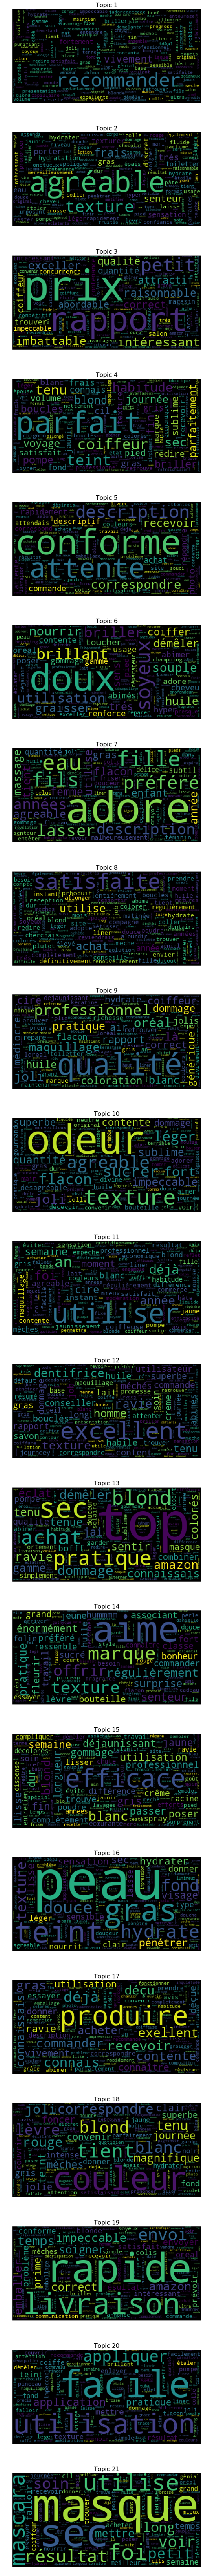

In [15]:
myarg = words_topic_list
wdc(*myarg)

In [16]:
# process = "Process4_b"
# algorithm = "LSI" # "lda" or "NMF" or "LSI"
# # for process in ["Process5_b", "Process4_b"]:
# # , 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21
# for k in [13, 14, 15, 16, 17, 18, 19, 20, 21]:
#     doc_topic_matrix_filepath = os.path.join(PATH, "data", algorithm + "_output", "k_" + str(k), process + "_doc_topic_matrix.csv")
#     word_topic_matrix_filepath = os.path.join(PATH, "data", algorithm + "_output", "k_" + str(k), process + "_word_topic_matrix.csv")
#     doc_topic_matrix = pd.read_csv(doc_topic_matrix_filepath, encoding='utf-8', sep=";")
#     word_topic_matrix = pd.read_csv(word_topic_matrix_filepath, encoding='utf-8', sep=";")
#     word_topic_matrix = word_topic_matrix.drop(['Unnamed: 0'], axis=1)
#     doc_topic_matrix = doc_topic_matrix.drop(['Unnamed: 0'], axis=1)

#     nb_topics = word_topic_matrix.shape[1] - 1
#     nb_documents = doc_topic_matrix.shape[0]
#     doc_topic_list = [0]*nb_documents
#     for i in range(nb_documents):
#         doc_topic_list[i] = pd.Series(doc_topic_matrix.iloc[i].drop(['documents']).values).sort_values(ascending=False).to_dict()
#     words_topic_list = [0]*nb_topics
#     for i in range(nb_topics):
#         words_topic_list[i] = pd.Series(word_topic_matrix[str(i)].values,index=word_topic_matrix.term).sort_values(ascending=False).to_dict()
#     myarg = words_topic_list
#     best_words(k, *myarg, nb_words=10)
#     myarg = doc_topic_list
#     best_topics(k, *myarg, ratio = 0.3)